# Exploratory Data Analysis - EDA
## 1. Overview
The COCOMO81 dataset is a collection of software project data used to estimate development effort based on the Constructive Cost Model (COCOMO), introduced by Barry Boehm in 1981. This dataset includes 63 software projects described by 17 cost factors.

The COCOMO81 dataset consists of following attributes:
#### features
1. **rely**: required software reliability
2. **data**: database size
3. **cplx**: process complexity
4. **time**: time constraint for cpu
5. **stor**: main memory constraint
6. **virt**: machine volatility
7. **turn**: turnaround time
8. **acap**: analysts capability
9. **aexp**: application experience
10. **pcap**: programmers capability
11. **vexp**: virtual machine experience
12. **lexp**: language experience
13. **modp**: modern programing practices
14. **tool**: use of software tools
15. **sced**: schedule constraint
16. **loc**: lines of code
#### target
17. **actual**: actual cost



## Import libraries

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import math

## Data loading

In [ ]:
data = arff.loadarff('cocomo81.arff')
df= pd.DataFrame(data[0])
df.to_csv('cocomo81.csv',index=False)
df = pd.read_csv('cocomo81.csv')
print(df.columns.tolist())

['rely', 'data', 'cplx', 'time', 'stor', 'virt', 'turn', 'acap', 'aexp', 'pcap', 'vexp', 'lexp', 'modp', 'tool', 'sced', 'loc', 'actual']


## Data inspection

### Checking dataset structure

In [ ]:
df.head(10)

,rely,data,cplx,time,stor,virt,turn,acap,aexp,pcap,vexp,lexp,modp,tool,sced,loc,actual
0,0.88,1.16,0.70,1.00,1.06,1.15,1.07,1.19,1.13,1.17,1.10,1.00,1.24,1.10,1.04,113.0,2040.0
1,0.88,1.16,0.85,1.00,1.06,1.00,1.07,1.00,0.91,1.00,0.90,0.95,1.10,1.00,1.00,293.0,1600.0
2,1.00,1.16,0.85,1.00,1.00,0.87,0.94,0.86,0.82,0.86,0.90,0.95,0.91,0.91,1.00,132.0,243.0
3,0.75,1.16,0.70,1.00,1.00,0.87,1.00,1.19,0.91,1.42,1.00,0.95,1.24,1.00,1.04,60.0,240.0
4,0.88,0.94,1.00,1.00,1.00,0.87,1.00,1.00,1.00,0.86,0.90,0.95,1.24,1.00,1.00,16.0,33.0
5,0.75,1.00,0.85,1.00,1.21,1.00,1.00,1.46,1.00,1.42,0.90,0.95,1.24,1.10,1.00,4.0,43.0
6,0.75,1.00,1.00,1.00,1.00,0.87,0.87,1.00,1.00,1.00,0.90,0.95,0.91,0.91,1.00,6.9,8.0
7,1.15,0.94,1.30,1.66,1.56,1.30,1.00,0.71,0.91,1.00,1.21,1.14,1.10,1.10,1.08,22.0,1075.0
8,1.15,0.94,1.30,1.30,1.21,1.15,1.00,0.86,1.00,0.86,1.10,1.07,0.91,1.00,1.00,30.0,423.0
9,1.40,0.94,1.30,1.11,1.56,1.00,1.07,0.86,0.82,0.86,0.90,1.00,1.00,1.00,1.00,29.0,321.0


### Identifying data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rely    63 non-null     float64
 1   data    63 non-null     float64
 2   cplx    63 non-null     float64
 3   time    63 non-null     float64
 4   stor    63 non-null     float64
 5   virt    63 non-null     float64
 6   turn    63 non-null     float64
 7   acap    63 non-null     float64
 8   aexp    63 non-null     float64
 9   pcap    63 non-null     float64
 10  vexp    63 non-null     float64
 11  lexp    63 non-null     float64
 12  modp    63 non-null     float64
 13  tool    63 non-null     float64
 14  sced    63 non-null     float64
 15  loc     63 non-null     float64
 16  actual  63 non-null     float64
dtypes: float64(17)
memory usage: 8.5 KB


### Check for duplication

In [ ]:
df.nunique()

rely       6
data       6
cplx       8
time      11
stor       5
virt       4
turn       5
acap       7
aexp       5
pcap       7
vexp       4
lexp       4
modp       6
tool       6
sced       4
loc       54
actual    61
dtype: int64

### Missing data

In [ ]:
df.isnull().sum()

rely      0
data      0
cplx      0
time      0
stor      0
virt      0
turn      0
acap      0
aexp      0
pcap      0
vexp      0
lexp      0
modp      0
tool      0
sced      0
loc       0
actual    0
dtype: int64

### Summary statistics of dataframe

In [ ]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
rely,63.0,1.036349,0.193477,0.75,0.88,1.00,1.15,1.40
data,63.0,1.003968,0.073431,0.94,0.94,1.00,1.04,1.16
cplx,63.0,1.091429,0.202563,0.70,1.00,1.07,1.30,1.65
time,63.0,1.113810,0.161639,1.00,1.00,1.06,1.11,1.66
stor,63.0,1.143810,0.179420,1.00,1.00,1.06,1.21,1.56
virt,63.0,1.008413,0.120593,0.87,0.87,1.00,1.15,1.30
turn,63.0,0.971746,0.080973,0.87,0.87,1.00,1.00,1.15
acap,63.0,0.905238,0.151507,0.71,0.86,0.86,1.00,1.46
aexp,63.0,0.948571,0.119243,0.82,0.82,1.00,1.00,1.29
pcap,63.0,0.937460,0.166510,0.70,0.86,0.86,1.00,1.42


Explain:
- **count**: The number of non-missing (non-NaN) values ​​in each column.
- **mean**: Average value of the column (applies to numeric data only).
- **std**: Standard deviation, which shows the dispersion of numerical data
- **min**: The smallest value in the column (for numeric data).
- **25%**: 25th percentile (Q1), i.e. 25% of values ​​are less than this level.
- **50%**: 50th percentile (Q2, median), i.e. values ​​that are in the middle of the data set.
- **75%**: 75th percentile (Q3), i.e. 75% of values ​​are less than this level.
- **max**: The largest value in the column (for numeric data).

### Data distribution

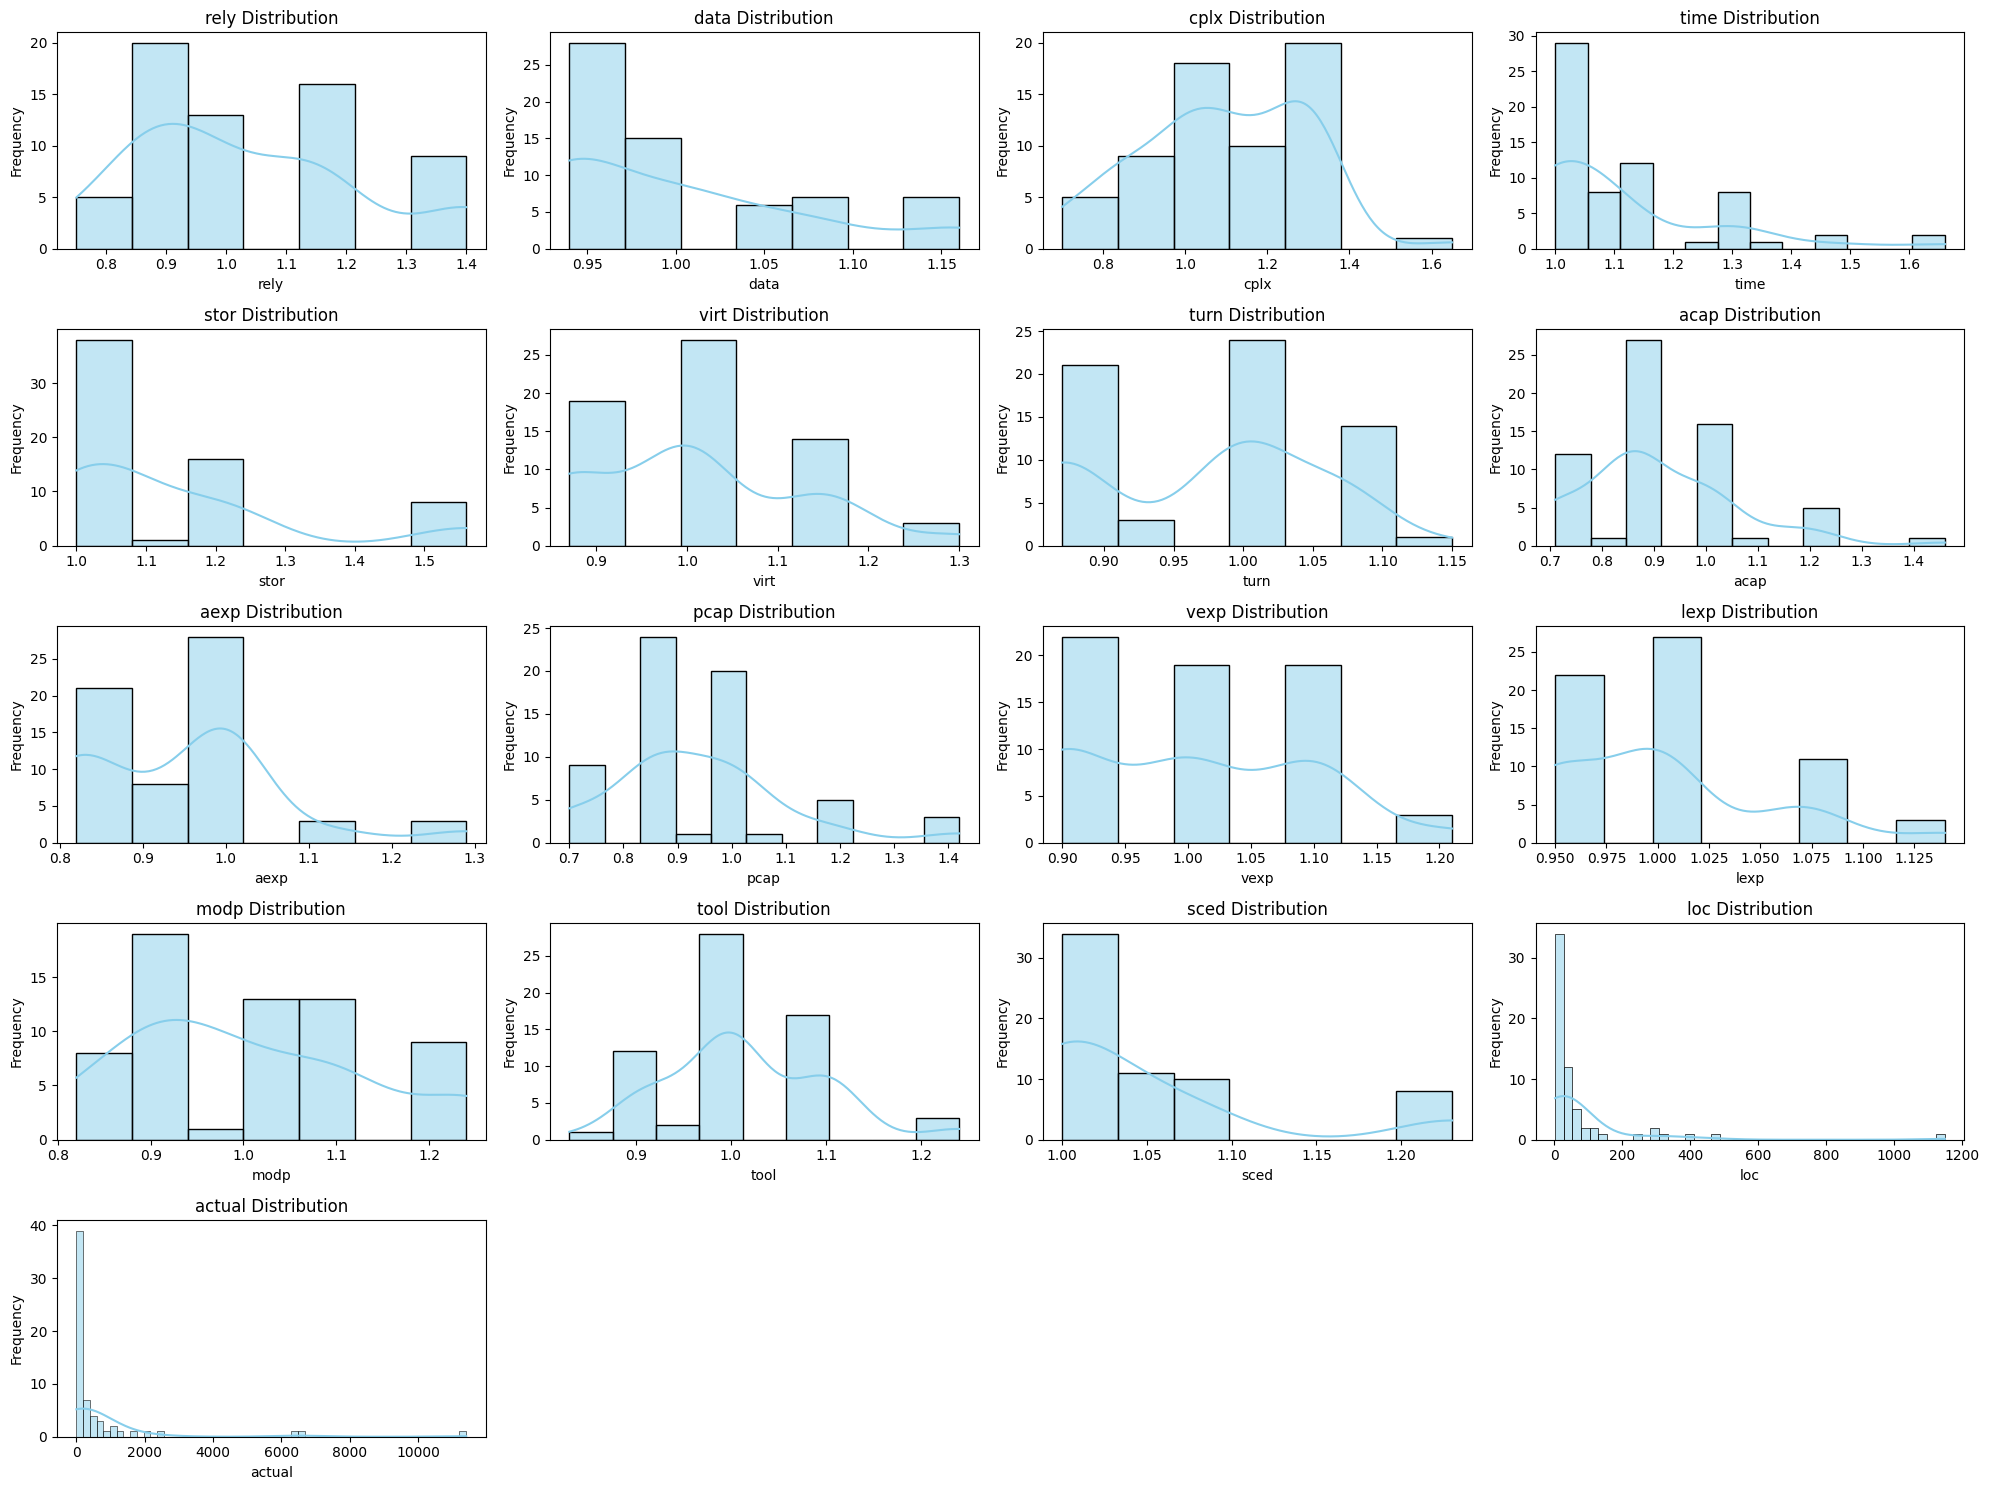

In [ ]:
cols = 4
rows = math.ceil(len(df.columns) / cols)

plt.figure(figsize=(20, 15))

for i, col in enumerate(df.columns):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Univariate analysis

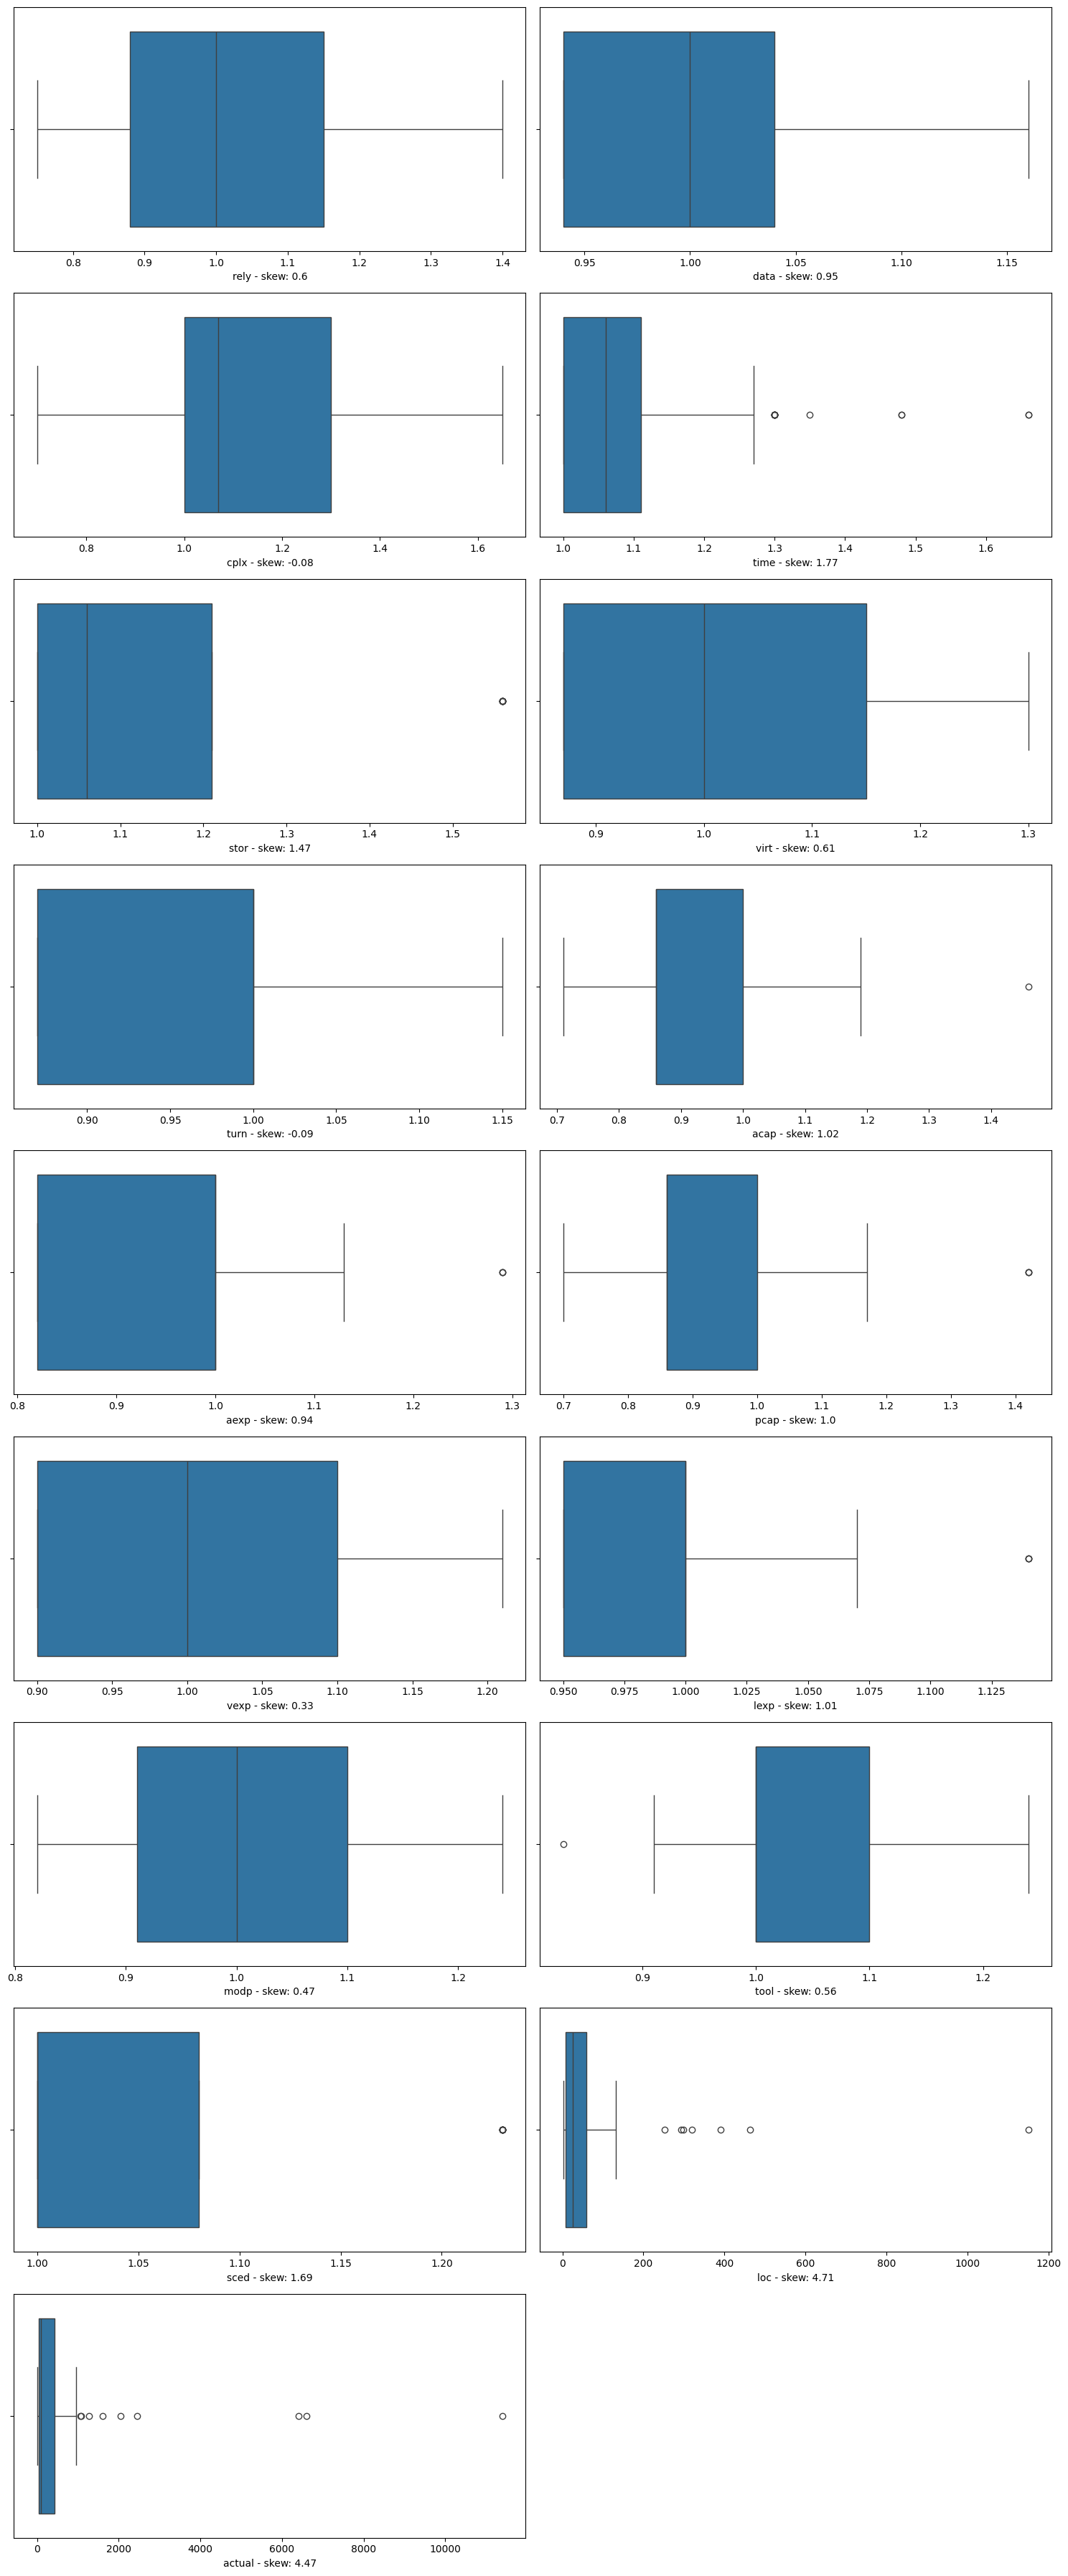

In [ ]:
fig, axes = plt.subplots(9, 2, figsize=(15, 36))

axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_xlabel(f'{col} - skew: {round(df[col].skew(), 2)}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Bivariate analysis

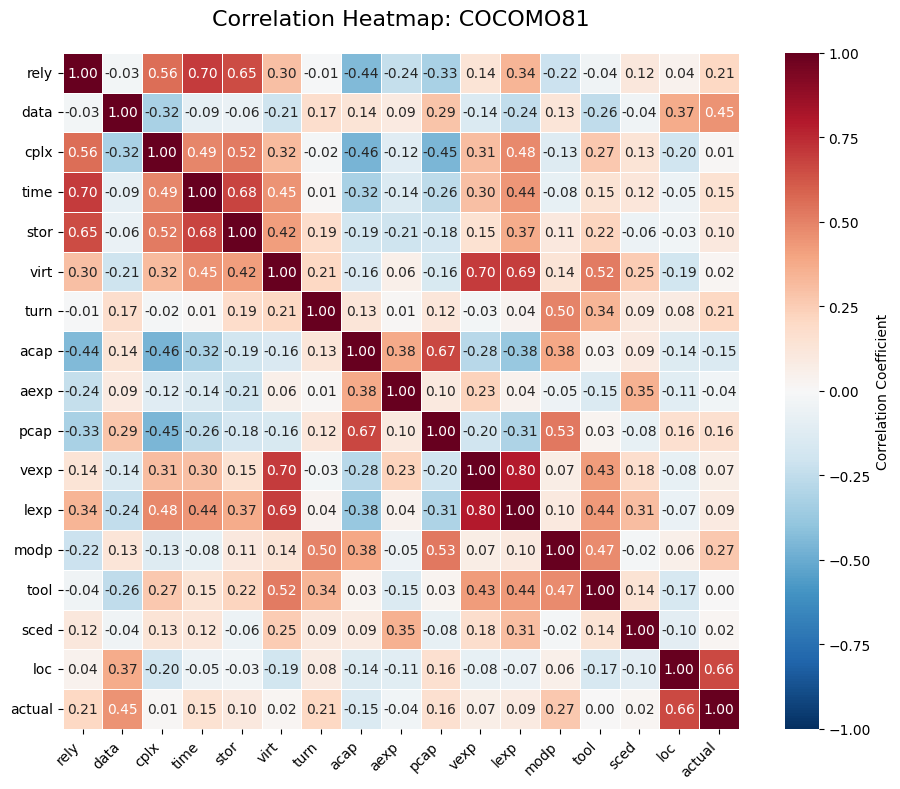

In [ ]:
plt.figure(figsize=(10, 8))  # Set figure size to match the example
sns.heatmap(df.corr(), 
            annot=True,            # Show correlation values in cells
            cmap='RdBu_r',         # Red-Blue reversed (red for positive, blue for negative)
            fmt='.2f',             # Format to 2 decimal places
            square=True,           # Make cells square
            linewidths=0.5,        # Add lines between cells
            cbar_kws={'label': 'Correlation Coefficient', 'shrink': 1},  # Customize color bar
            vmin=-1, vmax=1)       # Set the range of the color scale

plt.title('Correlation Heatmap: COCOMO81', fontsize=16, pad=20)  # Match the title
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(rotation=0)               # Keep y-axis labels horizontal
plt.tight_layout()                   # Adjust layout

# Step 5: Display the heatmap
plt.show()

### Feature engineering

In [ ]:
'''
    vexp-lexp: low importance of virtual machine experience compare with language experience
    virt-lexp: like vexp, low correlation with effort
    acap-pcap: analyist capability more impact with effort than programmer capability
'''
df_cleaned = df.copy()
df_cleaned.drop(columns=['vexp', 'virt', 'pcap'], inplace=True)

### Outliers handling

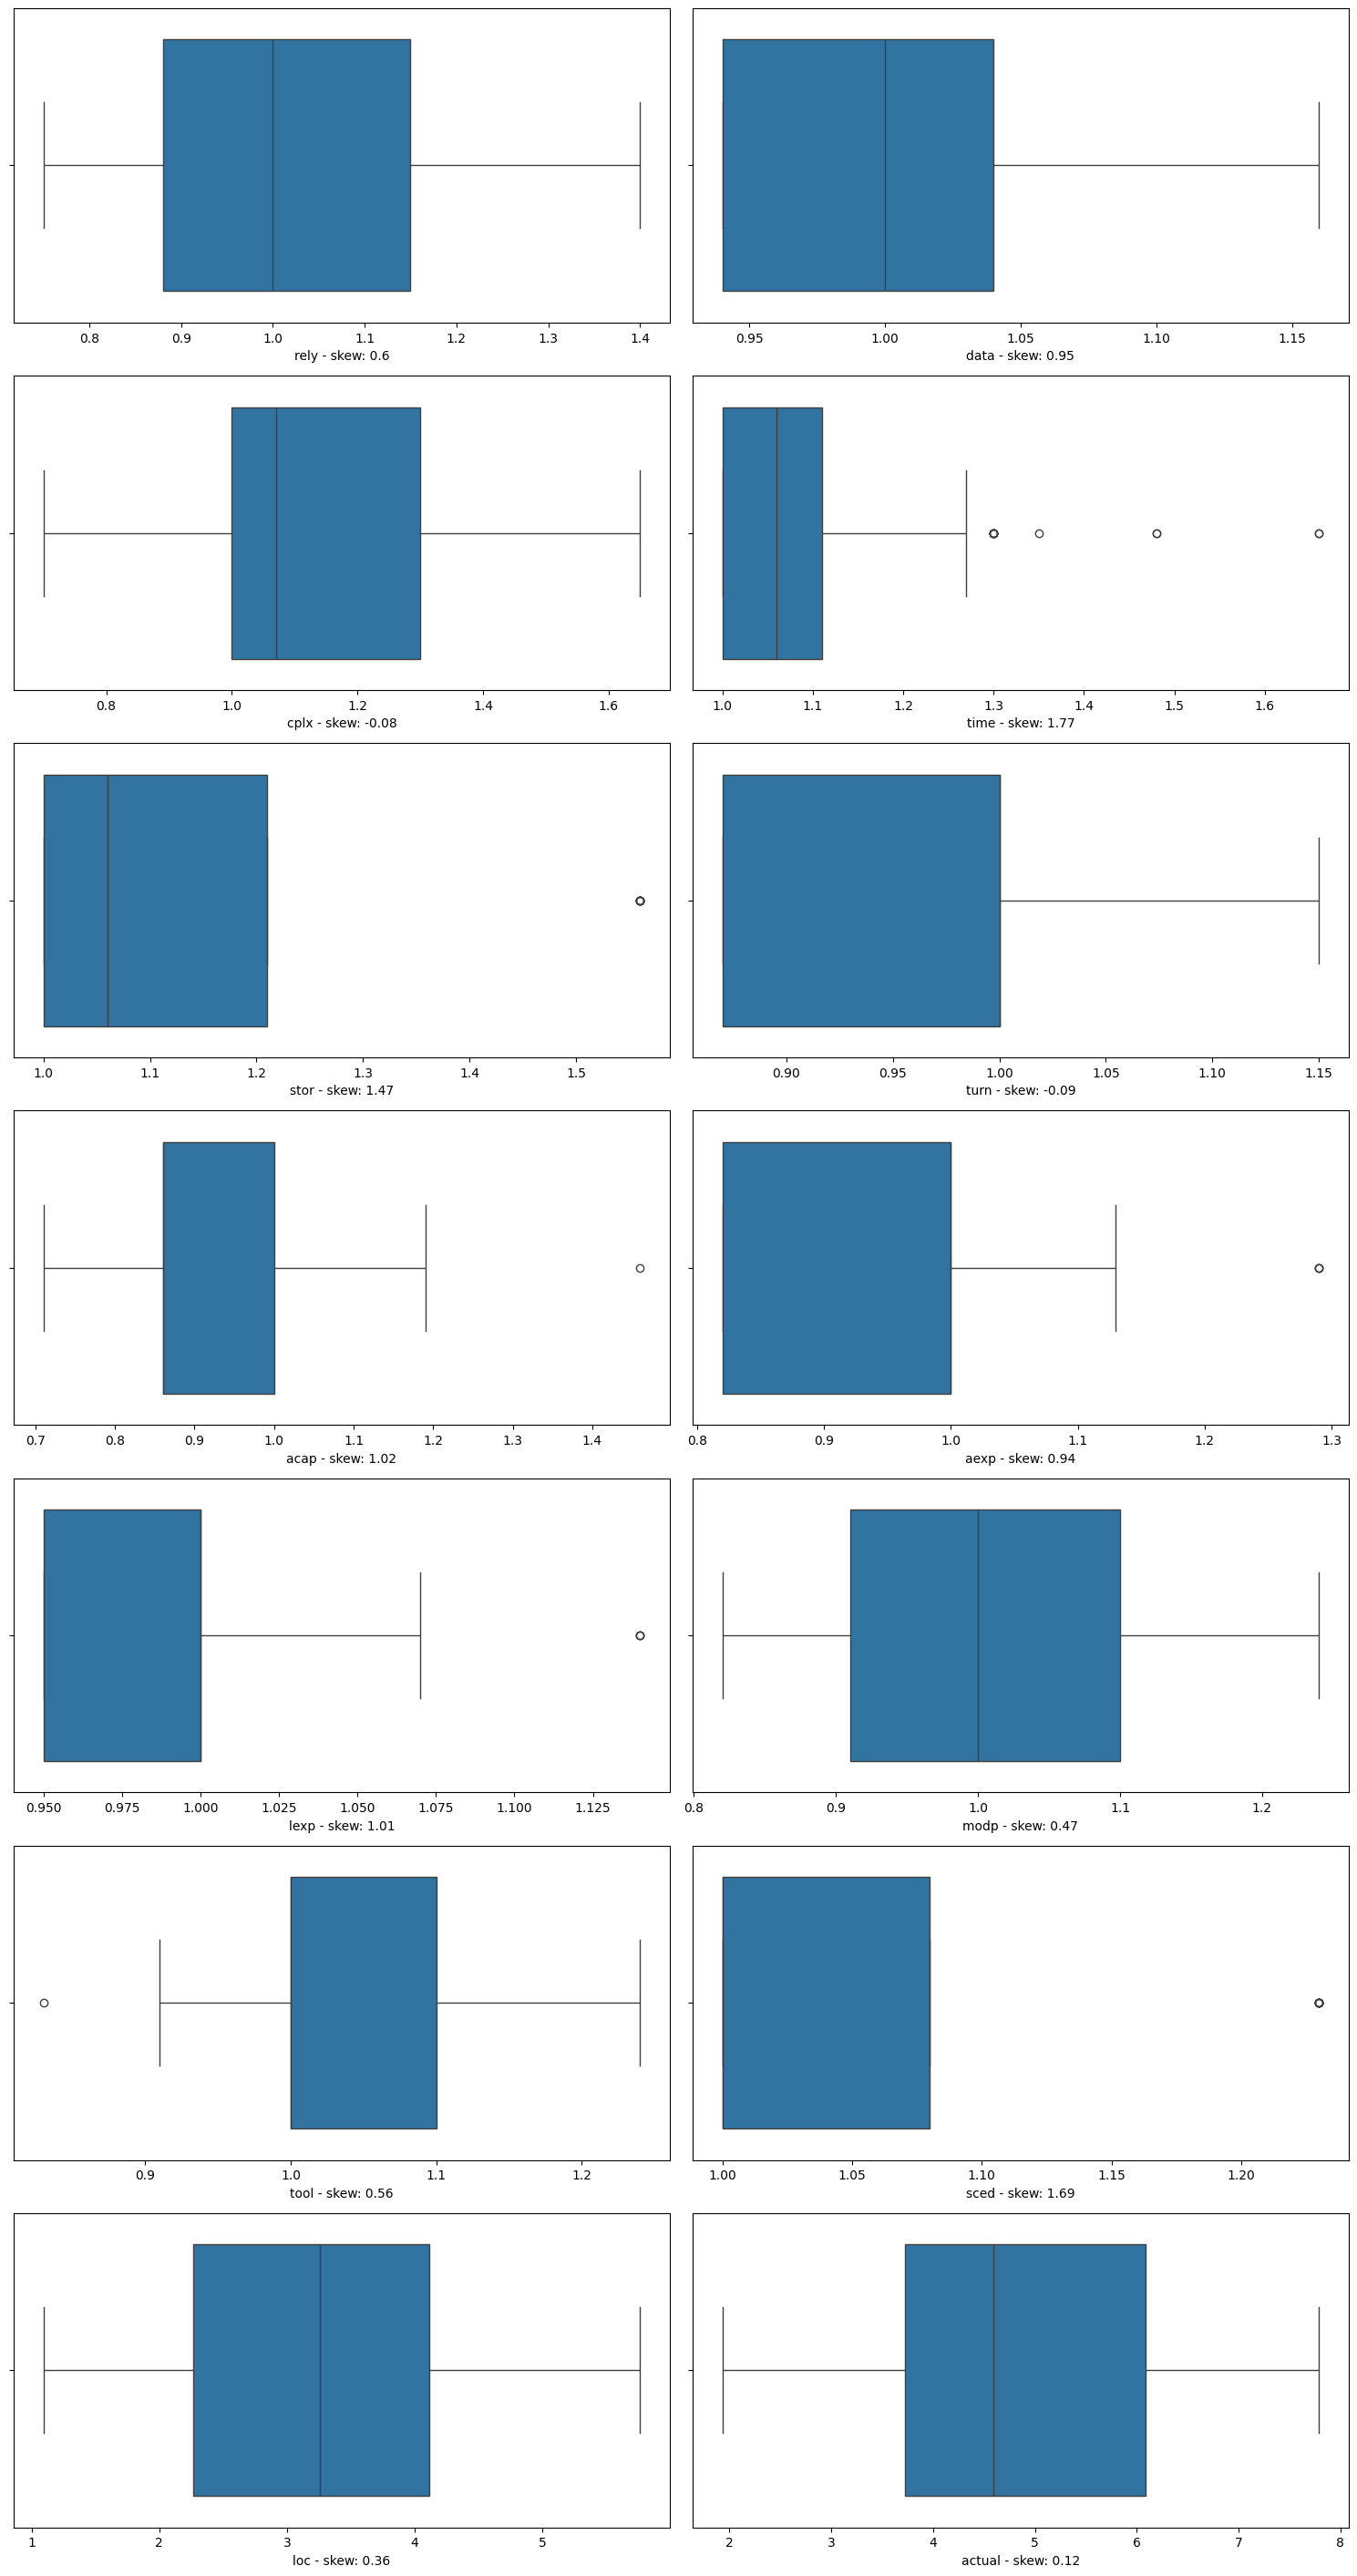

In [ ]:
for col in ['loc', 'actual']:
    percentile = df_cleaned[col].quantile(0.95)
    df_cleaned[col] = df_cleaned[col].clip(upper=percentile)

# high skew -> log transformation
df_cleaned['loc'] = np.log1p(df_cleaned['loc'])
df_cleaned['actual'] = np.log1p(df_cleaned['actual'])

fig, axes = plt.subplots(9, 2, figsize=(15, 36))

axes = axes.flatten()

for i, col in enumerate(df_cleaned.columns):
    sns.boxplot(x=df_cleaned[col], ax=axes[i])
    axes[i].set_xlabel(f'{col} - skew: {round(df_cleaned[col].skew(), 2)}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Save cleaned data

In [ ]:
df_cleaned.to_csv("cocomo81_preprocessed3.csv", index=False)